In [340]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statistics import variance
 
import matplotlib.pyplot as plt

import seaborn as sns

import warnings

import sys
import os

In [341]:
warnings.filterwarnings("ignore")

## Задание 1.

а). Сгенерировать гауссовский шум со средним значением 0 и дисперсией 1 (нормальное распределение), 500 точек

б). Построить график.

в). Провести тест (односторонний) на стационарность (тест Дики-Фуллера) при уровне значимости α = 0,05 с помощью statsmodels.tsa.stattools.adfuller (p-value – это второе возвращаемое значение).

In [342]:
MEAN = 0
STD = 1
COUNT = 500

In [343]:
x = np.random.normal(MEAN, STD, COUNT)
noise = np.random.normal(MEAN, STD, size=len(x))
x = x + noise

x

array([-4.35082512e-01,  9.39102377e-01,  2.71004463e-01,  2.90171583e+00,
        1.46687901e+00, -1.30474425e+00, -1.87305448e-01, -1.66380628e+00,
        1.08564296e+00,  4.10998565e-01, -2.16608140e+00,  7.32475753e-02,
       -1.81313632e+00,  2.75663946e+00,  3.40698629e-01, -4.05978985e-01,
        1.06260785e+00, -1.74419941e-01, -5.18258644e-01, -1.65281019e+00,
        1.75454482e+00,  4.15384236e-01,  1.14661909e+00,  9.26976718e-01,
        4.75973622e-01,  3.16372986e-01,  8.00764096e-01, -1.47243158e+00,
        7.75788866e-01, -4.61851944e-01,  8.15352089e-01,  2.10736108e+00,
       -1.25512139e+00,  2.75858423e+00,  6.57170794e-01,  8.17232893e-01,
        2.37191177e-01, -2.43999789e-01, -2.16782205e+00, -1.55899715e+00,
        1.06629615e+00, -5.40393504e-01, -6.66122811e-01,  1.93509016e-01,
        2.55534670e+00,  2.54105406e+00,  2.01312084e+00,  9.16336207e-01,
       -5.04183336e-01,  1.24074297e+00, -5.47734147e-01,  1.05173450e+00,
        1.39552928e-01, -

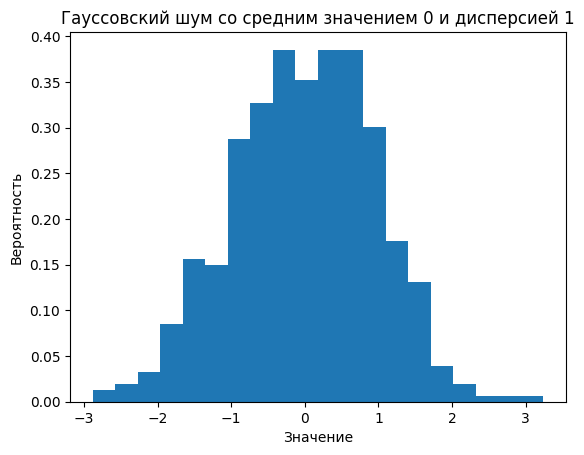

In [344]:
plt.hist(noise, bins=20, density=True)

plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.title('Гауссовский шум со средним значением 0 и дисперсией 1')
plt.show()

<Axes: title={'center': 'Гауссовский шум со средним значением 0 и дисперсией 1'}, xlabel='Значение', ylabel='Вероятность'>

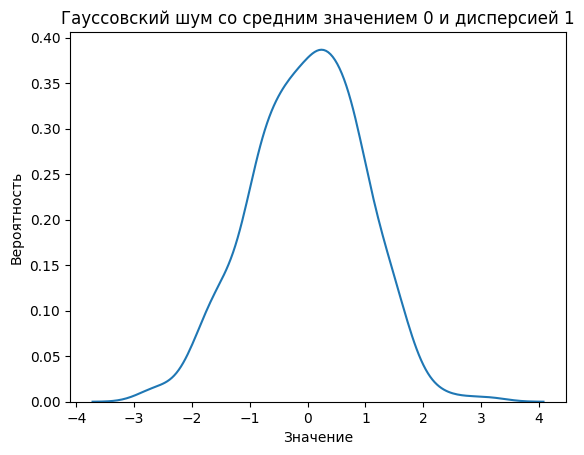

In [345]:
plt.xlabel('Значение')
plt.ylabel('Вероятность')
plt.title('Гауссовский шум со средним значением 0 и дисперсией 1')
sns.kdeplot(noise)

<Axes: >

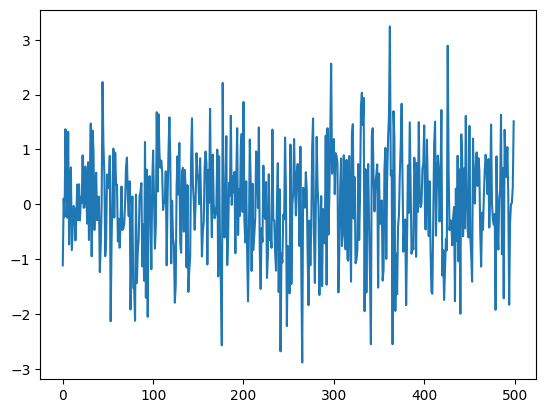

In [346]:
sns.lineplot(noise)

In [347]:
def check_stationary(x, alpha=0.05):
    test_stat, p_value, _, _, _, _ = sm.tsa.stattools.adfuller(x)
    is_stationary = False

    if p_value < alpha:
        is_stationary = True
      
    return {
        'p_value': p_value,
        'is_stationary': is_stationary
    }
    
def print_stationary(stationary_data):
    p_value = stationary_data['p_value']
    is_stationary = stationary_data['is_stationary']
  
    if is_stationary:
        print(f'Выборка является стационарной, значение p-value = {p_value} ')
        return

    print(f'Выборка не является стационарной, значение p-value = {p_value} ')
    
def print_full_test(noise, alpha=0.05):
  print_stationary(check_stationary(noise, alpha=alpha))
  print('Тест Дики Фуллера', sm.tsa.stattools.adfuller(noise))
  

In [348]:
print_full_test(noise, alpha=0.05)

Выборка является стационарной, значение p-value = 0.0 
Тест Дики Фуллера (-20.510735274144462, 0.0, 0, 499, {'1%': -3.4435228622952065, '5%': -2.867349510566146, '10%': -2.569864247011056}, 1341.4206753158478)


## Задание 2.

а). Добавить к временному ряду из первого задания тренд, равный 0,001x.

б). Построить график.

в). Провести DF-тест.

In [349]:
for i in range(0, 499):
    x[i] += i*0.001
    
x

array([-4.35082512e-01,  9.40102377e-01,  2.73004463e-01,  2.90471583e+00,
        1.47087901e+00, -1.29974425e+00, -1.81305448e-01, -1.65680628e+00,
        1.09364296e+00,  4.19998565e-01, -2.15608140e+00,  8.42475753e-02,
       -1.80113632e+00,  2.76963946e+00,  3.54698629e-01, -3.90978985e-01,
        1.07860785e+00, -1.57419941e-01, -5.00258644e-01, -1.63381019e+00,
        1.77454482e+00,  4.36384236e-01,  1.16861909e+00,  9.49976718e-01,
        4.99973622e-01,  3.41372986e-01,  8.26764096e-01, -1.44543158e+00,
        8.03788866e-01, -4.32851944e-01,  8.45352089e-01,  2.13836108e+00,
       -1.22312139e+00,  2.79158423e+00,  6.91170794e-01,  8.52232893e-01,
        2.73191177e-01, -2.06999789e-01, -2.12982205e+00, -1.51999715e+00,
        1.10629615e+00, -4.99393504e-01, -6.24122811e-01,  2.36509016e-01,
        2.59934670e+00,  2.58605406e+00,  2.05912084e+00,  9.63336207e-01,
       -4.56183336e-01,  1.28974297e+00, -4.97734147e-01,  1.10273450e+00,
        1.91552928e-01, -

<Axes: >

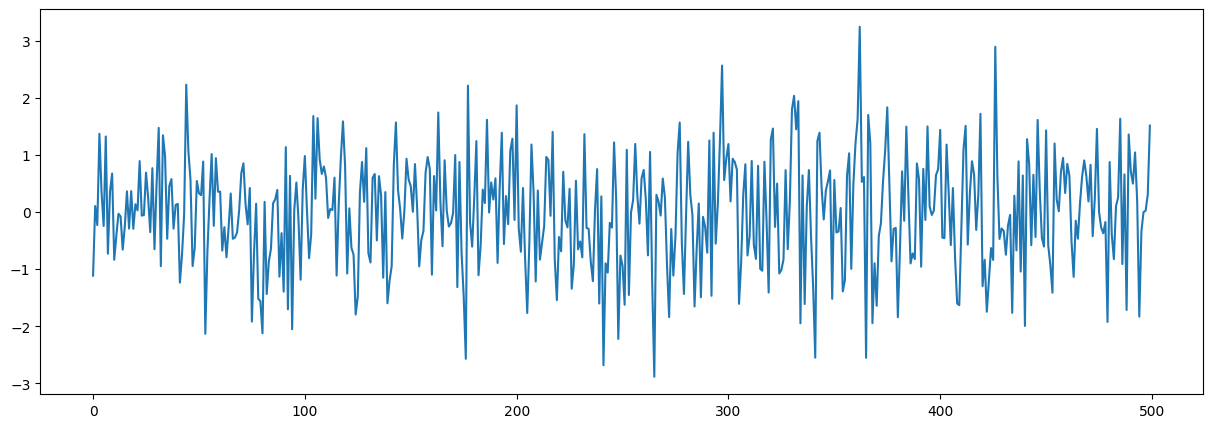

In [350]:
plt.figure(figsize=(15,5))

sns.lineplot(noise)

In [351]:
print_full_test(noise, alpha=0.05)

Выборка является стационарной, значение p-value = 0.0 
Тест Дики Фуллера (-20.510735274144462, 0.0, 0, 499, {'1%': -3.4435228622952065, '5%': -2.867349510566146, '10%': -2.569864247011056}, 1341.4206753158478)


## Задание 3.

а). Разбить датасет passengers на 3 части. Посчитать среднее и дисперсию на для каждой части, сравнить.

б). Сделать вывод о стационарности.

в). Прологарифмировать данные (использовать натуральный логарифм) и разбить на 3 части. Посчитать среднее и дисперсию на для каждой части, сравнить.

г). На логарифмированных повторить б).

д). Провести DF-тест на исходном датасете.

е). Провести DF-тест на логарифмированном датасете.

In [352]:
PASSENGER2_PATH = './passengers.csv'

In [353]:
df = pd.read_csv(PASSENGER2_PATH)

df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [354]:
df_1, df_2, df_3 = np.array_split(df, 3)

df_1

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [355]:
def stat_df(df, column):
  mean = round(df[column].mean(), 3)
  variance_computed = round(variance(df[column], 3))
  
  return {
    'mean': mean,
    'variance': variance_computed
  }

In [356]:
stat_df(df_1, '#Passengers')

{'mean': 158.375, 'variance': 25750}

In [357]:
stat_df(df_2, '#Passengers')

{'mean': 269.042, 'variance': 75390}

In [358]:
stat_df(df_3, '#Passengers')

{'mean': 413.479, 'variance': 178240}

In [359]:
print_full_test(df['#Passengers'], alpha=0.05)

Выборка не является стационарной, значение p-value = 0.9918802434376409 
Тест Дики Фуллера (0.8153688792060447, 0.9918802434376409, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [360]:
print_full_test(df_1['#Passengers'], alpha=0.05)

Выборка не является стационарной, значение p-value = 0.9950457583072548 
Тест Дики Фуллера (1.0803926305079228, 0.9950457583072548, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 298.61064295856863)


In [361]:
print_full_test(df_2['#Passengers'], alpha=0.05)

Выборка не является стационарной, значение p-value = 0.998557225672693 
Тест Дики Фуллера (1.918511037817533, 0.998557225672693, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 313.91178700799435)


In [362]:
print_full_test(df_3['#Passengers'], alpha=0.05)

Выборка не является стационарной, значение p-value = 0.996265619385095 
Тест Дики Фуллера (1.2423198262216877, 0.996265619385095, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, 355.26608121950864)


In [363]:
df_logged = df.copy()

df_logged['#Passengers'] = np.log(df_logged['#Passengers'])

In [364]:
df_logged

,Month,#Passengers
0,1949-01,4.718499
1,1949-02,4.770685
2,1949-03,4.882802
3,1949-04,4.859812
4,1949-05,4.795791
...,...,...
139,1960-08,6.406880
140,1960-09,6.230481
141,1960-10,6.133398
142,1960-11,5.966147


In [365]:
df_logged_1, df_logged_2, df_logged_3 = np.array_split(df_logged, 3)

df_logged_1

,Month,#Passengers
0,1949-01,4.718499
1,1949-02,4.770685
2,1949-03,4.882802
3,1949-04,4.859812
4,1949-05,4.795791
5,1949-06,4.905275
6,1949-07,4.997212
7,1949-08,4.997212
8,1949-09,4.912655
9,1949-10,4.779123


In [366]:
stat_df(df_logged_1, '#Passengers')

{'mean': 5.044, 'variance': 4}

In [367]:
stat_df(df_logged_1, '#Passengers')

{'mean': 5.044, 'variance': 4}

In [368]:
stat_df(df_logged_1, '#Passengers')

{'mean': 5.044, 'variance': 4}

In [369]:
print_full_test(df_logged['#Passengers'], alpha=0.05)

Выборка не является стационарной, значение p-value = 0.4223667747703902 
Тест Дики Фуллера (-1.7170170891069627, 0.4223667747703902, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, -445.3990312497209)


In [370]:
print_full_test(df_logged_1['#Passengers'], alpha=0.05)

Выборка не является стационарной, значение p-value = 0.9806083575207786 
Тест Дики Фуллера (0.37685234561966385, 0.9806083575207786, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, -76.60683895508078)


In [371]:
print_full_test(df_logged_2['#Passengers'], alpha=0.05)

Выборка не является стационарной, значение p-value = 0.9952062660783072 
Тест Дики Фуллера (1.09878808441968, 0.9952062660783072, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, -97.52267664019578)


In [372]:
print_full_test(df_logged_3['#Passengers'], alpha=0.05)

Выборка не является стационарной, значение p-value = 0.9940153057426723 
Тест Дики Фуллера (0.9768249713249483, 0.9940153057426723, 10, 37, {'1%': -3.6209175221605827, '5%': -2.9435394610388332, '10%': -2.6104002410518627}, -91.92370119163485)
